In [1]:
import os
import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
LFW_DATASET = 'data/lfw'

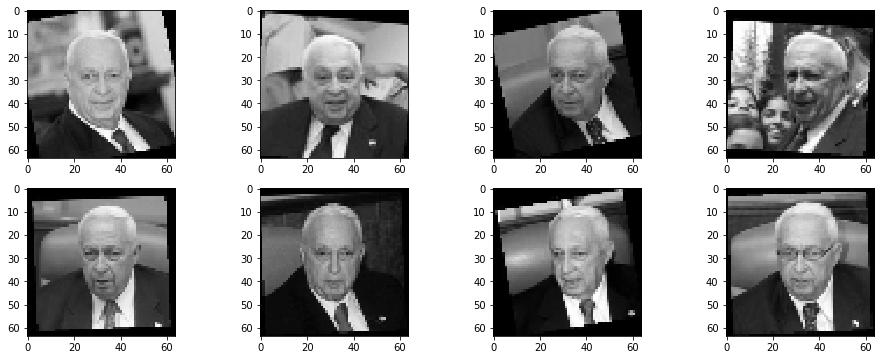

Read 1561 images of 12 persons from LFW dataset


In [3]:
n_imgs = 1561
width = height = 64

lfw_imgs = np.zeros((n_imgs, width, height, ), dtype=np.float32)
lfw_labels = np.zeros((n_imgs, ))
fig = plt.figure(figsize=(16, 6))
i = 1
unique_labels = {}
c = 0
for root, dirs, files in os.walk(LFW_DATASET):
    for file in files:
        if file.endswith(".jpg") and len(os.listdir(root))>50:
            img_path = os.path.join(root, file)
            img = cv2.resize(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY), (width, height))
            label = root.split('/')[-1]
            if label not in unique_labels:
                unique_labels[label] = c
                c+=1
            lfw_imgs[i-1] = np.array(img)
            lfw_labels[i-1] = unique_labels[label]
            if i<=8:
                plt.subplot(2, 4, i)
                plt.imshow(img, cmap='gray', vmin=0, vmax=255) 
            i+=1
plt.show()
print ("Read %s images of %s persons from LFW dataset"%(i,c))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lfw_imgs, lfw_labels, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1,width*height)
X_test = X_test.reshape(-1,width*height)

In [5]:
from sklearn.decomposition import PCA
n_components = 128
print("Extracting the top {} eigenfaces from {} faces".format(n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

# Transform data into principal components representation
print("Transforming the test data using the the orthonormal basis of PCA")
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 128 eigenfaces from 1248 faces
Transforming the test data using the the orthonormal basis of PCA


In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train_pca, y_train,)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [7]:
# Evaluation of the model
y_pred = model.predict(X_test_pca)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

         0.0       1.00      0.11      0.20        18
         1.0       0.50      0.45      0.48        44
         2.0       0.27      0.13      0.17        31
         3.0       0.46      0.79      0.58       110
         4.0       0.00      0.00      0.00        17
         5.0       0.00      0.00      0.00        17
         6.0       0.00      0.00      0.00         8
         7.0       1.00      0.07      0.13        14
         8.0       1.00      0.10      0.18        10
         9.0       0.33      0.30      0.32        10
        10.0       0.00      0.00      0.00         9
        11.0       0.22      0.32      0.26        25

    accuracy                           0.40       313
   macro avg       0.40      0.19      0.19       313
weighted avg       0.42      0.40      0.34       313



C:\Users\khushalpt\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import sklearn
pca_acc = sklearn.metrics.accuracy_score(y_test, y_pred, )

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [11]:
# Evaluation of the model
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        18
         1.0       0.93      0.93      0.93        44
         2.0       0.96      0.74      0.84        31
         3.0       0.86      0.97      0.91       110
         4.0       0.62      0.76      0.68        17
         5.0       1.00      0.59      0.74        17
         6.0       0.75      0.75      0.75         8
         7.0       0.79      0.79      0.79        14
         8.0       1.00      0.80      0.89        10
         9.0       1.00      0.80      0.89        10
        10.0       0.78      0.78      0.78         9
        11.0       0.83      0.80      0.82        25

    accuracy                           0.86       313
   macro avg       0.86      0.80      0.82       313
weighted avg       0.87      0.86      0.86       313



In [34]:
import sklearn
lda_acc = sklearn.metrics.accuracy_score(y_test, y_pred, )

In [13]:
from sklearn.decomposition import NMF
model = NMF(n_components=128, init='random', random_state=0)
X_train_nmf = model.fit_transform(X_train)
X_test_nmf = model.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train_nmf, y_train,)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [15]:
# Evaluation of the model
y_pred = model.predict(X_test_nmf)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.26      0.30      0.28        44
         2.0       0.29      0.16      0.21        31
         3.0       0.40      0.79      0.53       110
         4.0       0.25      0.12      0.16        17
         5.0       0.00      0.00      0.00        17
         6.0       0.00      0.00      0.00         8
         7.0       0.00      0.00      0.00        14
         8.0       0.00      0.00      0.00        10
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00         9
        11.0       0.25      0.12      0.16        25

    accuracy                           0.35       313
   macro avg       0.12      0.12      0.11       313
weighted avg       0.24      0.35      0.27       313



C:\Users\khushalpt\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import sklearn
nmf_acc = sklearn.metrics.accuracy_score(y_test, y_pred, )

In [18]:
from sklearn.decomposition import FastICA
model = FastICA(n_components=128, random_state=0)
X_train_ica = model.fit_transform(X_train)
X_test_ica = model.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train_ica, y_train,)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [20]:
# Evaluation of the model
y_pred = model.predict(X_test_ica)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

         0.0       1.00      0.11      0.20        18
         1.0       0.52      0.50      0.51        44
         2.0       0.40      0.19      0.26        31
         3.0       0.47      0.81      0.59       110
         4.0       0.00      0.00      0.00        17
         5.0       0.00      0.00      0.00        17
         6.0       0.00      0.00      0.00         8
         7.0       0.50      0.07      0.12        14
         8.0       1.00      0.10      0.18        10
         9.0       0.40      0.40      0.40        10
        10.0       0.00      0.00      0.00         9
        11.0       0.28      0.40      0.33        25

    accuracy                           0.43       313
   macro avg       0.38      0.22      0.22       313
weighted avg       0.42      0.43      0.37       313



C:\Users\khushalpt\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import sklearn
ica_acc = sklearn.metrics.accuracy_score(y_test, y_pred, )

In [23]:
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=128, random_state=0)
X_train_svd = model.fit_transform(X_train)
X_test_svd = model.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train_svd, y_train,)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [25]:
# Evaluation of the model
y_pred = model.predict(X_test_svd)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

         0.0       0.75      0.17      0.27        18
         1.0       0.40      0.52      0.45        44
         2.0       0.39      0.35      0.37        31
         3.0       0.44      0.78      0.56       110
         4.0       0.00      0.00      0.00        17
         5.0       0.00      0.00      0.00        17
         6.0       0.00      0.00      0.00         8
         7.0       1.00      0.14      0.25        14
         8.0       1.00      0.10      0.18        10
         9.0       0.00      0.00      0.00        10
        10.0       1.00      0.33      0.50         9
        11.0       0.20      0.12      0.15        25

    accuracy                           0.42       313
   macro avg       0.43      0.21      0.23       313
weighted avg       0.41      0.42      0.36       313



C:\Users\khushalpt\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
import sklearn
svd_acc = sklearn.metrics.accuracy_score(y_test, y_pred, )

In [28]:
!pip3 install lpproj
from lpproj import LocalityPreservingProjection 
model = LocalityPreservingProjection(n_components=128, )
X_train_lpp = model.fit_transform(X_train)
X_test_lpp = model.transform(X_test)

You should consider upgrading via the 'c:\users\khushalpt\anaconda33\python.exe -m pip install --upgrade pip' command.


In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train_lpp, y_train,)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [30]:
# Evaluation of the model
y_pred = model.predict(X_test_lpp)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

         0.0       0.33      0.06      0.10        18
         1.0       0.19      0.11      0.14        44
         2.0       0.00      0.00      0.00        31
         3.0       0.34      0.84      0.49       110
         4.0       0.00      0.00      0.00        17
         5.0       0.00      0.00      0.00        17
         6.0       0.00      0.00      0.00         8
         7.0       0.00      0.00      0.00        14
         8.0       0.00      0.00      0.00        10
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00         9
        11.0       0.00      0.00      0.00        25

    accuracy                           0.31       313
   macro avg       0.07      0.08      0.06       313
weighted avg       0.17      0.31      0.20       313



C:\Users\khushalpt\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import sklearn
lpp_acc = sklearn.metrics.accuracy_score(y_test, y_pred, )

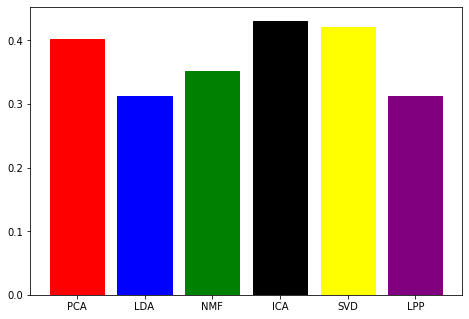

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tech = ['PCA', 'LDA', 'NMF', 'ICA', 'SVD', 'LPP']
accs = [pca_acc, lda_acc, nmf_acc, ica_acc, svd_acc, lpp_acc]
bars = ax.bar(tech, accs)
bars[0].set_color('red')
bars[1].set_color('blue')
bars[2].set_color('green')
bars[3].set_color('black')
bars[4].set_color('yellow')
bars[5].set_color('purple')
plt.show()

In [36]:
from sklearn.decomposition import PCA
n_components = 128
print("Extracting the top {} eigenfaces from {} faces".format(n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

# Transform data into principal components representation
print("Transforming the test data using the the orthonormal basis of PCA")
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 128 eigenfaces from 1248 faces
Transforming the test data using the the orthonormal basis of PCA


In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
X_train_lda = model.fit_transform(np.concatenate((X_train, X_train_pca), axis=1), y_train)

In [38]:
# Evaluation of the model
y_pred = model.predict(np.concatenate((X_test, X_test_pca), axis=1))

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        18
         1.0       0.93      0.93      0.93        44
         2.0       0.96      0.74      0.84        31
         3.0       0.86      0.97      0.91       110
         4.0       0.62      0.76      0.68        17
         5.0       1.00      0.59      0.74        17
         6.0       0.75      0.75      0.75         8
         7.0       0.79      0.79      0.79        14
         8.0       1.00      0.80      0.89        10
         9.0       1.00      0.80      0.89        10
        10.0       0.78      0.78      0.78         9
        11.0       0.83      0.80      0.82        25

    accuracy                           0.86       313
   macro avg       0.86      0.80      0.82       313
weighted avg       0.87      0.86      0.86       313



In [40]:
from time import time
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [41]:

def get_data():
    dataset = fetch_lfw_people(min_faces_per_person=20)   # labelled faces in the wild data with users more than 100 faces

    return dataset


def get_details(dataset):
    count_samples, height, width = dataset.images.shape

    X = dataset.data
    count_features = X.shape[1]

    # the label to predict is the id of the person
    y = dataset.target
    target_names = dataset.target_names
    count_classes = target_names.shape[0]

    print("number of samples: %d" % count_samples)
    print("number of features: %d" % count_features)
    print("number of classes: %d" % count_classes)

    return count_samples, height, width, X, count_features, y, target_names, count_classes


def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


In [42]:
def transform(model, X_train, X_test):
    X_train_model = model.transform(X_train)
    X_test_model = model.transform(X_test)
    
    return X_train_model, X_test_model


def transform_LDA(lda, pca, X_train, X_test):
    X_train_lda = lda.transform(pca.transform(X_train))
    X_test_lda = lda.transform(pca.transform(X_test))

    return X_train_lda, X_test_lda

In [43]:

def dr_PCA(n_components, X_train, height, width):
    print("PCA")
    print("%d eigenfaces extracted from %d faces"% (n_components, X_train.shape[0]))
    pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)

    eigenfaces = pca.components_.reshape((n_components, height, width))

    return pca, eigenfaces


def dr_ICA(n_components, X_train, height, width):
    print("ICA")
    print("%d eigenfaces extracted from %d faces" % (n_components, X_train.shape[0]))
    ica = FastICA(n_components=n_components, whiten=True).fit(X_train)

    eigenfaces = ica.components_.reshape((n_components, height, width))

    return ica, eigenfaces


def dr_LDA(n_components, X_train, y_train):
    print("LDA")
    print("%d fisherfaces extracted from %d faces"% (n_components, X_train.shape[0]))
    pca = PCA(n_components=n_components).fit(X_train)

    lda = LDA().fit(pca.transform(X_train), y_train)


    return lda, pca


In [44]:
def svc_classifier(X_train_model, y_train):
    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = clf.fit(X_train_model, y_train)
    print("estimator from grid search:")
    print(clf.best_estimator_)

    return clf


def prediction(model, data):
    print("names predicted on the test set")
    t0 = time()
    y_pred = model.predict(data)
    print("done in %0.3fs" % (time() - t0))

    return y_pred

In [45]:


def print_report(y_test, y_pred, target_names, count_classes):
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(confusion_matrix(y_test, y_pred, labels=range(count_classes)))


def plot_images(images, titles, height, width, n_row=1, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

    plt.show()


def plot_images_lda(pca, lda, titles, height, width, n_row=1, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(pca.inverse_transform(lda.scalings_[:, i]).reshape((height, width)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

    plt.show()


def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


def plot_confusion_matrix(y_true, y_pred, matrix_title):
     """confusion matrix computation and display"""
     plt.figure(figsize=(9, 9), dpi=100)

     # use sklearn confusion matrix
     cm_array = confusion_matrix(y_true, y_pred)
     plt.imshow(cm_array[:-1, :-1], interpolation='nearest', cmap=plt.cm.Blues)
     plt.title(matrix_title, fontsize=16)

     cbar = plt.colorbar(fraction=0.046, pad=0.04)
     cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)

     true_labels = np.unique(y_true)
     pred_labels = np.unique(y_pred)
     xtick_marks = np.arange(len(true_labels))
     ytick_marks = np.arange(len(pred_labels))

     plt.xticks(xtick_marks, true_labels, rotation=90)
     plt.yticks(ytick_marks, pred_labels)
     plt.tight_layout()
     plt.ylabel('True label', fontsize=14)
     plt.xlabel('Predicted label', fontsize=14)
     plt.tight_layout()

     plt.show()



     plot_confusion_matrix(y_test, y_pred, "matrix")

In [46]:

# Load data
dataset = get_data()

# get dataset details and target names
count_samples, height, width, X, count_features, y, target_names, count_classes = get_details(dataset)

# split into a training and testing set
X_train, X_test, y_train, y_test = split_data(X, y)

n_components = 150

number of samples: 3023
number of features: 2914
number of classes: 62


In [47]:
ica, eigenfaces_ica = dr_ICA(n_components, X_train, height, width)
lda, pca = dr_LDA(n_components, X_train, y_train)
pca, eigenfaces_pca = dr_PCA(n_components, X_train, height, width)


X_train_ica, X_test_ica = transform(ica, X_train, X_test)
X_train_lda, X_test_lda = transform_LDA(lda, pca, X_train, X_test)
X_train_pca, X_test_pca = transform(pca, X_train, X_test)



# Training a SVM classification model
clf_ica = svc_classifier(X_train_ica, y_train)
clf_lda = svc_classifier(X_train_lda, y_train)
clf_pca = svc_classifier(X_train_pca, y_train)

# Quantitative evaluation of the model quality on the test set
y_pred_ica = prediction(clf_ica, X_test_ica)
y_pred_lda = prediction(clf_lda, X_test_lda)
y_pred_pca = prediction(clf_pca, X_test_pca)

ICA
150 eigenfaces extracted from 2418 faces
LDA
150 fisherfaces extracted from 2418 faces
PCA
150 eigenfaces extracted from 2418 faces
estimator from grid search:
SVC(C=5000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
estimator from grid search:
SVC(C=50000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
estimator from grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
names pred

In [48]:




# printing classification report
print("ICA Report")
print_report(y_test, y_pred_ica, target_names, count_classes)
print("LDA Report")
print_report(y_test, y_pred_lda, target_names, count_classes)
print("PCA Report")
print_report(y_test, y_pred_pca, target_names, count_classes)



ICA Report
                           precision    recall  f1-score   support

         Alejandro Toledo       0.60      0.50      0.55        12
             Alvaro Uribe       0.60      0.50      0.55         6
          Amelie Mauresmo       0.57      0.67      0.62         6
             Andre Agassi       0.67      0.33      0.44         6
           Angelina Jolie       0.25      0.17      0.20         6
             Ariel Sharon       0.63      0.86      0.73        14
    Arnold Schwarzenegger       0.27      0.21      0.24        14
     Atal Bihari Vajpayee       1.00      0.33      0.50         6
             Bill Clinton       0.22      0.40      0.29         5
             Carlos Menem       0.75      0.75      0.75         4
             Colin Powell       0.81      0.81      0.81        59
            David Beckham       0.08      0.50      0.13         2
          Donald Rumsfeld       0.67      0.47      0.55        30
         George Robertson       0.67      1.00    

ICA Images


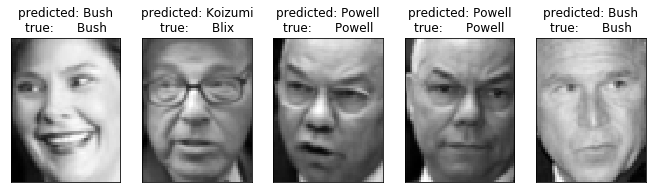

LDA Images


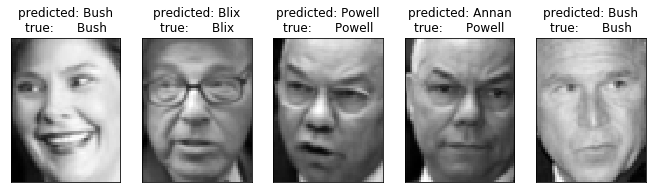

PCA Images


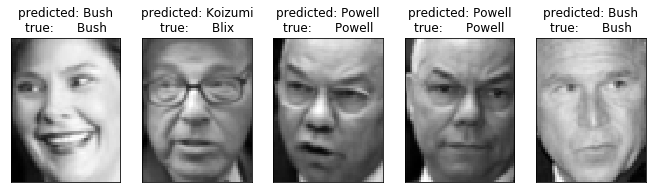

In [49]:
# printing images
print("ICA Images")
prediction_titles_ica = [title(y_pred_ica, y_test, target_names, i)
                     for i in range(y_pred_ica.shape[0])]

plot_images(X_test, prediction_titles_ica, height, width)
print("LDA Images")
prediction_titles_lda = [title(y_pred_lda, y_test, target_names, i)
                     for i in range(y_pred_lda.shape[0])]

plot_images(X_test, prediction_titles_lda, height, width)
print("PCA Images")
prediction_titles_pca = [title(y_pred_pca, y_test, target_names, i)
                     for i in range(y_pred_pca.shape[0])]

plot_images(X_test, prediction_titles_pca, height, width)



ICA eigen faces


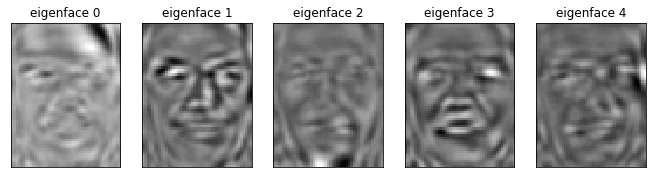

LDA fisher faces


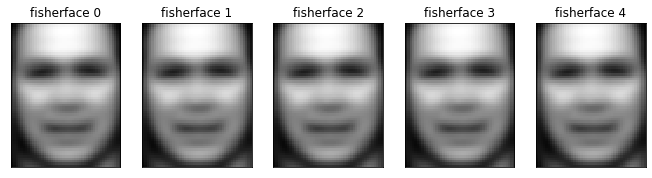

PCA eigen faces


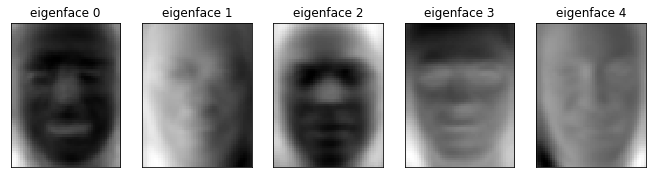

In [50]:
# plot ICA eigenfaces
print("ICA eigen faces")
eigenface_titles_ica = ["eigenface %d" % i for i in range(eigenfaces_ica.shape[0])]
plot_images(eigenfaces_ica, eigenface_titles_ica, height, width)

# plot fisherface
print("LDA fisher faces")
fisherface_titles_lda = ["fisherface %d" % i for i in range(5)]
plot_images_lda(pca, lda, fisherface_titles_lda, height, width)

# plot PCA eigenfaces
print("PCA eigen faces")
eigenface_titles_pca = ["eigenface %d" % i for i in range(eigenfaces_pca.shape[0])]
plot_images(eigenfaces_pca, eigenface_titles_pca, height, width)